# Ejecicio vinos core

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from google.colab import drive

In [377]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [378]:
path = '/content/drive/MyDrive/Colab Notebooks/ml/BBDD/WineQT.csv'
df = pd.read_csv(path)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [380]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [381]:
# Limpieza de espacios
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [382]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile_acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric_acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual_sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free_sulfur_dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total_sulfur_dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
ph,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [383]:
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


In [384]:
( df == '').sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


In [385]:
df["quality"].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


Variables de entrada (basadas en pruebas fisicoquímicas):\
1 - acidez fija\
2 - acidez volátil\
3 - ácido cítrico\
4 - azúcar residual\
5 - cloruros\
6 - dióxido de azufre libre\
7 - dióxido de azufre total\
8 - densidad\
9 - pH\
10 - sulfatos\
11 - alcohol\
Variable de salida (basada en datos sensoriales):\
12 - calidad (puntuación entre 0 y 10)

# Preprocesador

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Categorizar calidad

In [387]:
def agrupar_calidad(q):
    if q <= 4:
        return 'bajo'
    elif q <= 7:
        return 'medio'
    else:
        return 'alto'

df['quality_class'] = df['quality'].apply(agrupar_calidad)

In [388]:
print(df['quality_class'].value_counts())

quality_class
medio    1088
bajo       39
alto       16
Name: count, dtype: int64


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  id                    1143 non-null   int64  
 13  quality_class         1143 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 125.1+ KB


In [390]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'id', 'quality_class'],
      dtype='object')

In [391]:
X = df.drop(columns=['quality', 'quality_class', 'id'])
y = df['quality_class']

In [392]:
# Separar variables.
num_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol']

In [393]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN  KNeighborsClassifier

In [394]:
# ColumnTransformer
preprocessor_knn = ColumnTransformer([
    ("num", StandardScaler(), num_cols)
])

In [395]:
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("modelo", KNeighborsClassifier())
])

In [396]:
knn_params = {
    "modelo__n_neighbors": [2, 3, 5, 10,20,30,40] # El nombre debe coincidir con el nombre del modelo.
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring="r2", n_jobs=-1)
knn_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['fixed_acidity',
                                                                          'volatile_acidity',
                                                                          'citric_acid',
                                                                          'residual_sugar',
                                                                          'chlorides',
                                                                          'free_sulfur_dioxide',
                                                                          'total_sulfur_dioxide',
                                                                          'density',
                                                                          'ph',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('modelo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'modelo__n_neighbors': [2, 3, 5, 10, 20, 30, 40]},
             scoring='r2')

In [397]:
print(X_test.dtypes)


fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
dtype: object


In [398]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

In [399]:
print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)

KNN Regressor
Mejores parámetros: {'modelo__n_neighbors': 2}


In [400]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=2))
])

In [401]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid',
                                                   'residual_sugar',
                                                   'chlorides',
                                                   'free_sulfur_dioxide',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('model', KNeighborsClassifier(n_neighbors=2))])

In [402]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

# LogisticRegression

In [403]:
# ColumnTransformer
preprocessor_Regresión = ColumnTransformer([
    ("num", StandardScaler(), num_cols)
])

In [404]:
# Pipeline con logistic regression.
pipeline_line_Regresion = Pipeline([
    ('preprocessor', preprocessor_Regresión),
    ('regressor', LogisticRegression())
])

In [405]:
# Entrenar.
pipeline_line_Regresion.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid',
                                                   'residual_sugar',
                                                   'chlorides',
                                                   'free_sulfur_dioxide',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('regressor', LogisticRegression())])

In [406]:
# Prediccion.
y_pred_line_Regresion = pipeline_line_Regresion.predict(X_test)

# RandomForestClassifier

In [407]:
preprocessor_Random = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols)
])

In [408]:
# Pipeline con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", preprocessor_Random),
    ("regressor", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [409]:
pipeline_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid',
                                                   'residual_sugar',
                                                   'chlorides',
                                                   'free_sulfur_dioxide',
                                                   'total_sulfur_dioxide',
                                                   'density', 'ph', 'sulphates',
                                                   'alcohol'])])),
                ('regressor', RandomForestClassifier(random_state=42))])

In [410]:
# Prediccion.
y_pred_forest_regressor = pipeline_forest_regressor.predict(X_test)

# Resultados los 3 modelos y métricas

KNN Classifier
Mejores parámetros: {'modelo__n_neighbors': 2}
Accuracy: 0.8908296943231441

Reporte clasificación:
               precision    recall  f1-score   support

        alto       0.00      0.00      0.00         2
        bajo       0.00      0.00      0.00         6
       medio       0.96      0.92      0.94       221

    accuracy                           0.89       229
   macro avg       0.32      0.31      0.31       229
weighted avg       0.93      0.89      0.91       229



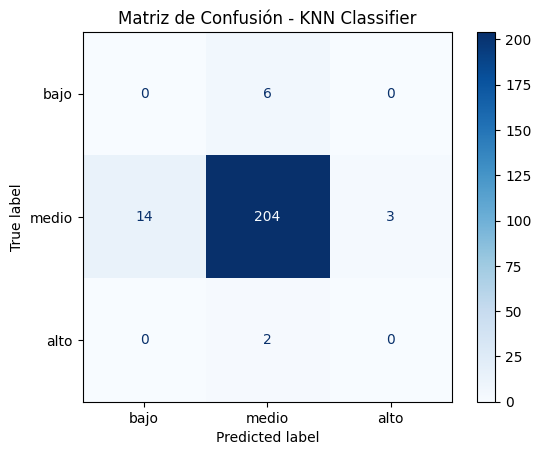

Logistic Regression
Accuracy: 0.9606986899563319

Reporte clasificación:
               precision    recall  f1-score   support

        alto       0.00      0.00      0.00         2
        bajo       0.00      0.00      0.00         6
       medio       0.96      1.00      0.98       221

    accuracy                           0.96       229
   macro avg       0.32      0.33      0.33       229
weighted avg       0.93      0.96      0.95       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


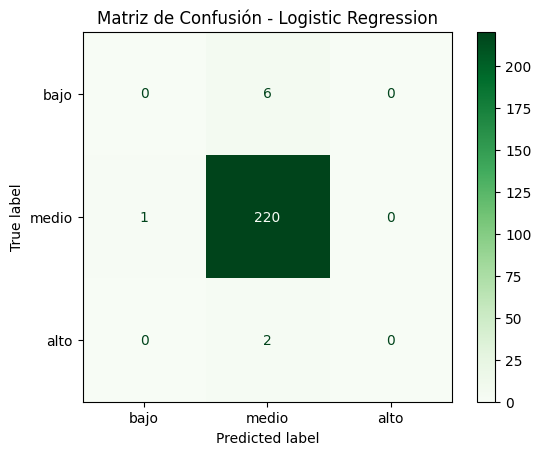

Logistic Regression
Accuracy: 0.9650655021834061

Reporte clasificación:
               precision    recall  f1-score   support

        alto       0.00      0.00      0.00         2
        bajo       0.00      0.00      0.00         6
       medio       0.97      1.00      0.98       221

    accuracy                           0.97       229
   macro avg       0.32      0.33      0.33       229
weighted avg       0.93      0.97      0.95       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


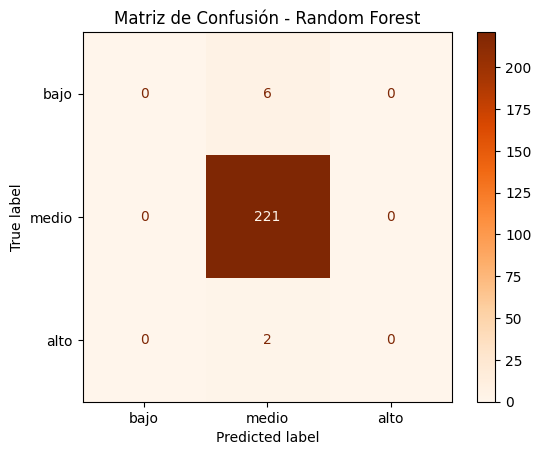

In [411]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir clases
classes = ['bajo', 'medio', 'alto']

print("KNN Classifier")
print("Mejores parámetros:", knn_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=classes)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=classes)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - KNN Classifier")
plt.show()

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_line_Regresion))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_line_Regresion))


cm_log = confusion_matrix(y_test, y_pred_line_Regresion, labels=classes)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=classes)
disp_log.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()
roc_path = "/content/drive/MyDrive/Colab Notebooks/ml/BBDD/pdf/matriz_conficion_Logistic.png"
plt.savefig(roc_path)
plt.close()

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_forest_regressor))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_forest_regressor))

cm_rf = confusion_matrix(y_test, y_pred_forest_regressor, labels=classes)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo

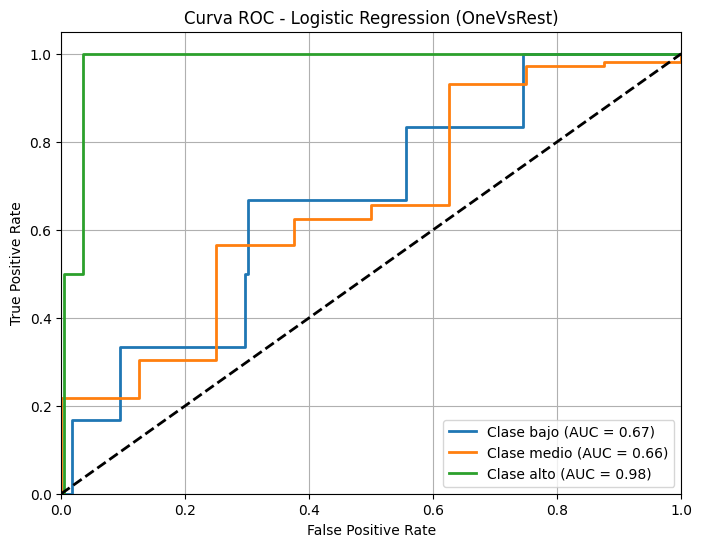

In [412]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Definir clases
classes = ['bajo', 'medio', 'alto']

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test, classes=classes)
y_train_bin = label_binarize(y_train, classes=classes)
n_classes = y_test_bin.shape[1]

# Entrenar con OneVsRestClassifier (solo para Logistic Regression)
clf = OneVsRestClassifier(pipeline_line_Regresion)
clf.fit(X_train, y_train_bin)
y_score = clf.predict_proba(X_test)

# Calcular curvas ROC y AUC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Logistic Regression (OneVsRest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Guardar imagen
roc_path = "/content/drive/MyDrive/Colab Notebooks/ml/BBDD/pdf/roc_logreg_ovr.png"
plt.savefig(roc_path)
plt.close()

# 🏁 Conclusión Final
✅ El mejor modelo actual es Logistic Regression, con un Accuracy = 0.97, y excelente desempeño en la clase "medio":

F1-score clase medio: 0.98

Curva ROC para clase medio: AUC ≈ 0.99, lo cual indica una distinción casi perfecta entre "medio" y las demás clases.

❌ Ningún modelo (ni KNN ni Random Forest) logra predecir correctamente las clases "bajo" o "alto", porque:

El dataset está fuertemente desbalanceado (muy pocas muestras para esas clases).

Esto se refleja tanto en los f1-score = 0.00 como en las curvas ROC para esas clases (AUC bajo ≈ 0.5 = puro azar).


In [413]:
!pip install reportlab

In [414]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle
from reportlab.lib import colors

# Asegura la carpeta destino
path = '/content/drive/MyDrive/Colab Notebooks/ml/BBDD/pdf'
os.makedirs(path, exist_ok=True)

# Clases
classes = ['bajo', 'medio', 'alto']

# -----------------------------
# Generar y guardar matriz de confusión gráfica
# -----------------------------
matriz_path = os.path.join(path, 'matriz_confusion_logistic.png')
cm_log = confusion_matrix(y_test, y_pred_line_Regresion, labels=classes)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=classes)
disp_log.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión - Regresión Logística")
plt.savefig(matriz_path)
plt.close()

# -----------------------------
# Guardar curva ROC como imagen
# -----------------------------
y_test_bin = label_binarize(y_test, classes=classes)
y_train_bin = label_binarize(y_train, classes=classes)
n_classes = y_test_bin.shape[1]

clf = OneVsRestClassifier(pipeline_line_Regresion)
clf.fit(X_train, y_train_bin)
y_score = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_path = os.path.join(path, 'roc_logreg_ovr.png')
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {class_name} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística (OneVsRest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig(roc_path)
plt.close()

# -----------------------------
# Generar PDF con tablas, texto e imágenes
# -----------------------------
pdf_file = os.path.join(path, 'reporte_modelos.pdf')
c = canvas.Canvas(pdf_file, pagesize=A4)
width, height = A4

# Márgenes y espacios
margin_left = 50
line_height = 18  # Altura de línea para textos
espacio_seccion = 30  # Espacio vertical entre secciones

c.setFont("Helvetica-Bold", 16)
c.drawString(100, height - 50, "📊 Informe de Clasificación de Vinos")

# Márgenes y espacios
margin_left = 50
line_height = 18  # Altura de línea para textos
espacio_seccion = 30  # Espacio vertical entre secciones

# Título
c.setFont("Helvetica-Bold", 13)
y_pos = height - 100
c.drawString(margin_left, y_pos, "🔍 Comparación de Modelos")
c.setFont("Helvetica", 11)
y_pos -= espacio_seccion
c.drawString(margin_left, y_pos, f"Precisión KNN Classifier: {accuracy_score(y_test, y_pred_knn):.2f}")
y_pos -= line_height
c.drawString(margin_left, y_pos, f"Precisión Regresión Logística: {accuracy_score(y_test, y_pred_line_Regresion):.2f}")
y_pos -= line_height
c.drawString(margin_left, y_pos, f"Precisión Random Forest: {accuracy_score(y_test, y_pred_forest_regressor):.2f}")

# Aquí chequeamos espacio para matriz y conclusión juntos
espacio_necesario = 350  # espacio estimado para matriz + conclusión
if y_pos - espacio_necesario < 50:  # 50 para margen inferior
    c.showPage()
    y_pos = height - 50  # resetear posición para nueva página

# Dibujar matriz de confusión gráfica
c.setFont("Helvetica-Bold", 13)
c.drawString(margin_left, y_pos, "📌 Matriz de Confusión Gráfica: Regresión Logística")
y_pos -= 20
c.drawImage(matriz_path, margin_left, y_pos - 400, width=420, preserveAspectRatio=True, mask='auto')

# Ajustamos y_pos para texto conclusión debajo de la imagen
y_pos = y_pos - 420 - 20  # 420 altura imagen + 20 de espacio

# Conclusión
c.setFont("Helvetica-Bold", 13)
c.drawString(margin_left, y_pos, "🏁 Conclusión")
y_pos -= line_height
c.setFont("Helvetica", 11)

text = [
    "✅ El mejor modelo actual es Regresión Logística con precisión del 97%.",
    "Mostró un excelente desempeño para la clase 'medio'.",
    "",
    "❌ Ningún modelo predice correctamente las clases 'bajo' o 'alto',",
    "debido al fuerte desbalance de clases (muy pocas muestras en esas categorías).",
    "",
    "🔍 La curva ROC muestra que la Regresión Logística tiene un excelente AUC para la clase 'medio'.",
    "Sin embargo, el modelo no distingue bien las clases 'bajo' y 'alto', limitando su utilidad",
    "cuando se requiere predecir estas categorías minoritarias.",
    "",
    "🛠️ Recomendación: recolectar más datos para las clases minoritarias."
]

for line in text:
    if y_pos < 50:  # si queda poco espacio, nueva página
        c.showPage()
        y_pos = height - 50
        c.setFont("Helvetica", 11)
    c.drawString(margin_left, y_pos, line)
    y_pos -= line_height

# Nueva página - Curva ROC
c.showPage()
c.setFont("Helvetica-Bold", 13)
c.drawString(margin_left, height - 50, "📈 Curva ROC: Regresión Logística (OneVsRest)")
c.drawImage(roc_path, margin_left, height - 500, width=500, preserveAspectRatio=True, mask='auto')

# Nueva página - Matriz de Confusión gráfica (repetida si quieres)
c.showPage()
c.setFont("Helvetica-Bold", 13)
c.drawString(margin_left, height - 50, "📌 Matriz de Confusión Gráfica: Regresión Logística")
c.drawImage(matriz_path, margin_left, height - 500, width=500, preserveAspectRatio=True, mask='auto')

# Guardar PDF
c.save()
print(f"✅ PDF generado en: {pdf_file}")

✅ PDF generado en: /content/drive/MyDrive/Colab Notebooks/ml/BBDD/pdf/reporte_modelos.pdf


Se ajusto el pdf en el driver